<a href="https://colab.research.google.com/github/logsmay/inter-probe/blob/main/stats-101/Statistics_101_%26_Probability_Primer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [242]:
import math

import numpy as np
import pandas as pd
from scipy import stats

from scipy.stats import norm

from matplotlib import pyplot as plt

In [271]:
# manual calculations

#get random list
def get_random_list(from_val, to_val, size):
  random_list = np.random.randint(from_val, to_val, size=size)
  return random_list


def get_sorted_list(_list):
  _list.sort()
  return _list

def get_median_range(_list, ignore_sort=False):
  n = len(_list)
  print("incoming list size: " + str(n))

  if ignore_sort == False:
    print("sorting...")
    _list.sort()
  else:
    print('ignore sort...')

  min = _list[0]
  max = _list[n-1]
  print("n: " + str(n) + " ;idx range: (0..." + str((n-1)) + ")")
  if n%2 == 0:
    median_idx1 = int((n/2)-1)
    median_idx2 = int(n/2)
    print("median index (even): " + str(median_idx1) + "," + str(median_idx2))
    median = (_list[median_idx1] + _list[median_idx2])/2
  else:
    median_idx = int(((n+1)/2)-1)
    print("median index (odd): " + str(median_idx))
    median = _list[median_idx]
  return median, min, max


def get_mean(_list):
  tot = sum(_list)
  n = len(_list)
  mean = float("{0:.5f}".format(tot / n))
  return mean


#manual calculation standard deviation
def get_sd(_list):
  _list.sort()
  n = len(_list)
  tot = 0
  for elem in _list:
    tot += elem
  mean = float("{0:.5f}".format(tot / n))
  sig_sum = 0
  for elem in _list:
    sig_s1 = pow(elem-mean, 2)
    sig_sum += sig_s1
  sd = float("{0:.5f}".format(math.sqrt(sig_sum/(n))))
  return mean, sd


def get_z_score(x, mean, sd):
  z_score = float("{0:.5f}".format((x - mean)/sd))
  return z_score


def get_z_score_from_list(_list):
  z_score_arr = []
  mean, sd = get_sd(_list)
  arr_val_set = set(_list)
  for val in arr_val_set: 
    val_dict = {}
    val_dict['val'] = val
    val_dict['freq'] = len(_list[_list == val])
    val_dict['zscore'] = get_z_score(val, mean, sd)
    z_score_arr.append(val_dict)
  return z_score_arr


In [272]:
# configurations

from_val = 0
to_val = 100
size = 50

r_list = get_random_list(from_val, to_val, size)
print(r_list)


[45 99 28 24 50 13 39 60 39 57 21 21 73 28 81 97 61 39 37 47 41 74 94 74
 42 29 11 34 77 83 72 67 76 67 16 31 97 12 56 80 32 85 54 56 83 17 35 13
 85  1]


In [276]:
random_list = np.random.randint(from_val, to_val, size=size)
print("unsorted list")
print(random_list)

#sort list
random_list.sort()
print("sorted list")
print(random_list)

# calculate median, mode, range, mean  
max = np.max(random_list)
min = np.min(random_list)

#mean x̄
mean = np.mean(random_list)
print('###> mean x̄ <###')
print(mean)

#median x̃
median = np.median(random_list)
print("###> median x̃ <###")
print(median)

#mode mo
mode, mo_count = stats.mode(random_list)
print("###> mode Mo <###")
print("smallest mode: " + str(mode[0]))
print("count mode: " + str(mo_count[0]))

#range
range = max-min
print("###> range <###")
print(range)

#standard deviation
std = float("{0:.5f}".format(np.std(random_list)))
print("###> std deviation σ <###")
print(std)

#zscore
zscore = stats.zscore(random_list)
print("###> zscore z <###")
print(zscore)

unsorted list
[45 47 18 84 70 36 44 20 21 67 39  3 58 84 23 96 96 84 30 71 33 76 95 84
 40 56 68 91 72 57 90 76 38 17 55 85 48 38 98  5 57 72  6 43 83 37 33 95
 79 69]
sorted list
[ 3  5  6 17 18 20 21 23 30 33 33 36 37 38 38 39 40 43 44 45 47 48 55 56
 57 57 58 67 68 69 70 71 72 72 76 76 79 83 84 84 84 84 85 90 91 95 95 96
 96 98]
###> mean x̄ <###
56.64
###> median x̃ <###
57.0
###> mode Mo <###
smallest mode: 84
count mode: 4
###> range <###
95
###> std deviation σ <###
27.0287
###> zscore z <###
[-1.98455746 -1.91056203 -1.87356431 -1.46658944 -1.42959173 -1.3555963
 -1.31859858 -1.24460315 -0.98561914 -0.87462599 -0.87462599 -0.76363285
 -0.72663513 -0.68963742 -0.68963742 -0.6526397  -0.61564199 -0.50464884
 -0.46765112 -0.43065341 -0.35665798 -0.31966026 -0.06067625 -0.02367854
  0.01331918  0.01331918  0.05031689  0.38329633  0.42029405  0.45729176
  0.49428948  0.53128719  0.56828491  0.56828491  0.71627577  0.71627577
  0.82726892  0.97525978  1.0122575   1.0122575   1.012257

In [277]:
# manual functions & calculations 
r_list = random_list
sorted_list = get_sorted_list(r_list)
median, min, max = get_median_range(sorted_list, ignore_sort=True)
mean, sd = get_sd(r_list)
print("median, min, max: " + str((median, min, max)))
print("mean, sd: " + str((mean, sd)))
print(get_z_score(0, mean, sd))
get_z_score_from_list(r_list)

incoming list size: 50
ignore sort...
n: 50 ;idx range: (0...49)
median index (even): 24,25
median, min, max: (57.0, 3, 98)
mean, sd: (56.64, 27.0287)
-2.09555


[{'freq': 1, 'val': 3, 'zscore': -1.98456},
 {'freq': 1, 'val': 5, 'zscore': -1.91056},
 {'freq': 1, 'val': 6, 'zscore': -1.87356},
 {'freq': 1, 'val': 17, 'zscore': -1.46659},
 {'freq': 1, 'val': 18, 'zscore': -1.42959},
 {'freq': 1, 'val': 20, 'zscore': -1.3556},
 {'freq': 1, 'val': 21, 'zscore': -1.3186},
 {'freq': 1, 'val': 23, 'zscore': -1.2446},
 {'freq': 1, 'val': 30, 'zscore': -0.98562},
 {'freq': 2, 'val': 33, 'zscore': -0.87463},
 {'freq': 1, 'val': 36, 'zscore': -0.76363},
 {'freq': 1, 'val': 37, 'zscore': -0.72664},
 {'freq': 2, 'val': 38, 'zscore': -0.68964},
 {'freq': 1, 'val': 39, 'zscore': -0.65264},
 {'freq': 1, 'val': 40, 'zscore': -0.61564},
 {'freq': 1, 'val': 43, 'zscore': -0.50465},
 {'freq': 1, 'val': 44, 'zscore': -0.46765},
 {'freq': 1, 'val': 45, 'zscore': -0.43065},
 {'freq': 1, 'val': 47, 'zscore': -0.35666},
 {'freq': 1, 'val': 48, 'zscore': -0.31966},
 {'freq': 1, 'val': 55, 'zscore': -0.06068},
 {'freq': 1, 'val': 56, 'zscore': -0.02368},
 {'freq': 2, 'va

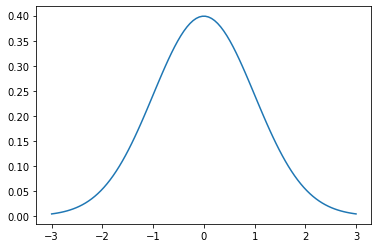

In [269]:
# empirical rule
mu = 0
sigma = 1
x = np.linspace(mu - (3*sigma), mu + (3*sigma), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()